# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Base URL to pull from:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

cities_list = []


for index, city in enumerate(cities):
    try: 
            if (index <50):
                print(f'Processing Record {index + 1} of Set {1}'\
                 f' | {city}')
            if (index<100) & (index>50):
                print(f'Processing Record {index + 1} of Set {2}'\
                f' | {city}')
            if (index<150) & (index>100):
                print(f'Processing Record {index + 1} of Set {3}'\
                f' | {city}')
            if (index<200) & (index>150):
                print(f'Processing Record {index + 1} of Set {4}'\
                 f' | {city}')
            if (index<250) & (index>200):
                print(f'Processing Record {index + 1} of Set {5}'\
                 f' | {city}')
            if (index<300) & (index>250):
                print(f'Processing Record {index + 1} of Set {6}'\
                 f' | {city}')
            if (index<350) & (index>300):
                print(f'Processing Record {index + 1} of Set {7}'\
                 f' | {city}')
            if (index<400) & (index>350):
                print(f'Processing Record {index + 1} of Set {8}'\
                 f' | {city}')
            if (index<450) & (index>400):
                print(f'Processing Record {index + 1} of Set {9}'\
                 f' | {city}')
            if (index<500) & (index>450):
                print(f'Processing Record {index + 1} of Set {10}'\
                 f' | {city}')
            if (index<550) & (index>500):
                print(f'Processing Record {index + 1} of Set {11}'\
                 f' | {city}')
            if (index<600) & (index>550):
                print(f'Processing Record {index + 1} of Set {12}'\
                 f' | {city}')
    
    #URL per city            
            city_url = url + "&q=" + city 
    
    
    #Retrieve data
            city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

        # Append the City information into city_data list
            cities_list.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date}) 
    except:
        print("City not found. Skipped...")
    pass


Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | belushya guba
City not found. Skipped...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | bosaso
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | kangundo
Processing Record 10 of Set 1 | necochea
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | acapulco
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | ust-shonosha
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | sur
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | challans
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 | sao filipe
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
print(city_weather)

{'coord': {'lon': -120.6133, 'lat': 37.3894}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 86.83, 'feels_like': 83.82, 'temp_min': 83.75, 'temp_max': 92.34, 'pressure': 1010, 'humidity': 24}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 300}, 'clouds': {'all': 1}, 'dt': 1623900640, 'sys': {'type': 1, 'id': 4865, 'country': 'US', 'sunrise': 1623847279, 'sunset': 1623900315}, 'timezone': -25200, 'id': 5410144, 'name': 'Winton', 'cod': 200}


In [6]:
city_df = pd.DataFrame(cities_list)
city_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       busselton -33.6500  115.3333     59.04        64           0   
1    punta arenas -53.1500  -70.9167     28.51        93           0   
2       carnarvon -24.8667  113.6333     68.07        42           0   
3  ribeira grande  38.5167  -28.7000     65.43        91         100   
4       cape town -33.9258   18.4232     59.41        89          75   

   Wind Speed Country        Date  
0        6.96      AU  1623900407  
1        6.91      CL  1623900272  
2       18.41      AU  1623900408  
3       24.00      PT  1623900409  
4        1.01      ZA  1623900374

In [7]:
city_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [8]:
city_df.to_csv("WeatherHW.csv", index = False)

In [9]:
city_df

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          busselton -33.6500  115.3333     59.04        64           0   
1       punta arenas -53.1500  -70.9167     28.51        93           0   
2          carnarvon -24.8667  113.6333     68.07        42           0   
3     ribeira grande  38.5167  -28.7000     65.43        91         100   
4          cape town -33.9258   18.4232     59.41        89          75   
..               ...      ...       ...       ...       ...         ...   
580          longkou  37.6508  120.3286     65.93        94         100   
581      derzhavinsk  51.1000   66.3167     88.02        21          60   
582  verkhniye sergi  56.6469   59.5556     68.18        70          83   
583             nuuk  64.1835  -51.7216     38.01        93          20   
584           winton  37.3894 -120.6133     92.34        24           1   

     Wind Speed Country        Date  
0          6.96      AU  1623900407  
1          6.91      CL  1623900272  
2         18.41      AU  1623900408  
3         24.00      PT  1623900409  
4          1.01      ZA  1623900374  
..          ...     ...         ...  
580        6.78      CN  1623900639  
581        8.30      KZ  1623900639  
582       10.71      RU  1623900640  
583        5.75      GL  1623900640  
584       12.66      US  1623900640  

[585 rows x 9 columns]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_df.describe()

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  585.000000  585.000000  585.000000  585.000000  585.000000  585.000000   
mean    20.978004   19.427973   67.407436   70.205128   53.121368    7.980479   
std     33.323761   92.655006   14.600610   21.179006   39.018050    5.570166   
min    -54.800000 -179.166700   22.950000    1.000000    0.000000    0.000000   
25%     -6.134900  -65.712500   57.520000   61.000000    8.000000    3.710000   
50%     26.466700   24.662200   68.630000   75.000000   60.000000    6.910000   
75%     50.033300  102.500000   78.530000   86.000000   93.000000   11.010000   
max     78.218600  179.316700  106.270000  100.000000  100.000000   30.240000   

               Date  
count  5.850000e+02  
mean   1.623901e+09  
std    8.779074e+01  
min    1.623900e+09  
25%    1.623900e+09  
50%    1.623901e+09  
75%    1.623901e+09  
max    1.623901e+09

In [11]:
#NO City with humidity above 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<ipython-input-35-5eb876ec5480>:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "replace" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("../output_data/Fig1.png", replace = True)


<function matplotlib.pyplot.show(close=None, block=None)>

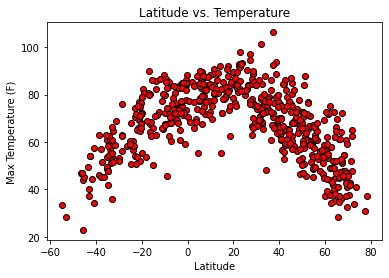

In [35]:
latitude = city_df["Lat"]
temperature = city_df["Max Temp"]
#Plot the lat vs max temp

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Temperature")
plt.scatter(latitude, temperature, color = "red", edgecolors = "black")
plt.savefig("../output_data/Fig1.png")
plt.show

In the plot above we see the correlation between the latitude of a city and their respective highest recorded temperature. We can clearly see that the highest temperatures are recorded nearest the latitude value of zero in an upside down parabola. We can understand this correlation in a higher level by understanding that the latitude value of zero represents the Equator while the outter extremities are the North and South Poles.

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

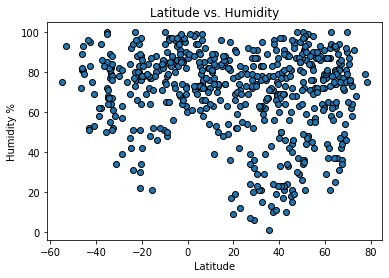

In [13]:
humidity = city_df["Humidity"]

plt.xlabel("Latitude"),
plt.ylabel("Humidity %"),
plt.title("Latitude vs. Humidity"),
plt.scatter(latitude, humidity, edgecolors= "black"),
plt.savefig("../output_data/Fig2.png")
plt.show


There seems to be more humidity in cities with a negative Latitude value with all values plotted having more than 25 percent humidity. The cities with a positive latitude tend to have a much more spread out range of humidity percentages but many of them do fall under the 25% value. In essence, there is usually more rain in the Southern Hemisphere or at least more humidity.

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

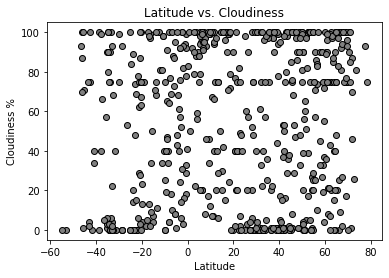

In [28]:
cloudiness = city_df["Cloudiness"]

plt.xlabel("Latitude"),
plt.ylabel("Cloudiness %"),
plt.title("Latitude vs. Cloudiness"),
plt.scatter(latitude, cloudiness, color = "gray", edgecolors = "black"),
plt.savefig("../output_data/Fig3.png")
plt.show

No apparent correlation can be determined between latitude and cloudiness!

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

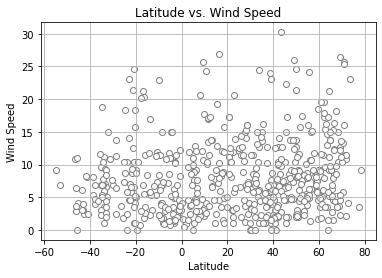

In [15]:
wind_speed = city_df["Wind Speed"]

plt.xlabel("Latitude"),
plt.ylabel("Wind Speed"),
plt.title("Latitude vs. Wind Speed"),
plt.scatter(latitude, wind_speed, color = "white", edgecolors = "gray"),
plt.grid(),
plt.savefig("../output_data/Fig4.png")
plt.show

Most cities do not experience high wind speeds and typically fall under a value of 12. There is a good amount of cities with higher wind speed values but they are not as prevalent. Ultimately, there is no correlation between latitude and wind speed.

## Linear Regression

In [16]:
#Separate Northern and Southern hemispheres

north_df = city_df.loc[(city_df["Lat"] > 0)].dropna()
south_df = city_df.loc[(city_df["Lat"] < 0)].dropna()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is:  -0.7400445431414086
Temperature has a negative Linear Regression correlation with latitude. As you travel higher North the temperature decreases!


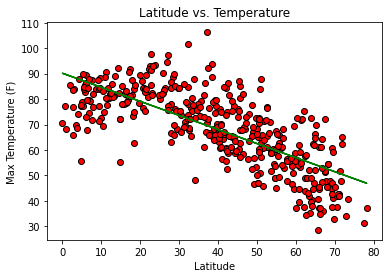

In [17]:
northlat = north_df["Lat"]
northtemp = north_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(northlat, northtemp)
print("The r value is: ", rvalue)
line_eq = northlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Temperature")
plt.scatter(northlat, northtemp, color = "red", edgecolors = "black")
plt.plot(northlat, line_eq, color = "green")
plt.show

print("Temperature has a negative Linear Regression correlation with latitude. As you travel higher North the temperature decreases!" )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is:  0.7743502075276005
Temperature has a positive Linear Regression correlation with latitude. As you travel towards the Equator the temperature increases!


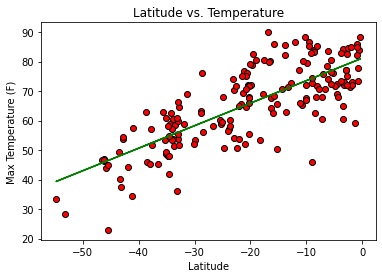

In [18]:
southlat = south_df["Lat"]
southtemp = south_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(southlat, southtemp)
print("The r value is: ", rvalue)
line_eq2 = southlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Temperature")
plt.scatter(southlat, southtemp, color = "red", edgecolors = "black")
plt.plot(southlat, line_eq2, color = "green")
plt.show

print("Temperature has a positive Linear Regression correlation with latitude. As you travel towards the Equator the temperature increases!" )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is:  -0.03526095832176361
Humidity has a slightly negative Linear Regression correlation with latitude. As you travel higher North the humidity decreases!


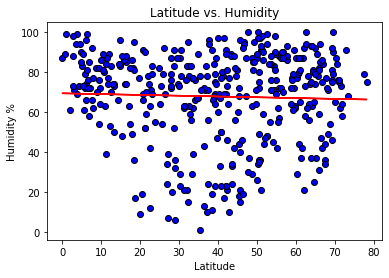

In [19]:
northhum = north_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(northlat, northhum)
print("The r value is: ", rvalue)
line_eq3 = northlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity")
plt.scatter(northlat, northhum, color = "blue", edgecolors = "black")
plt.plot(northlat, line_eq3, color = "red")
plt.show

print("Humidity has a slightly negative Linear Regression correlation with latitude. As you travel higher North the humidity decreases!" )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is:  0.13511528294218714
Humidity has no correlation with latitude!


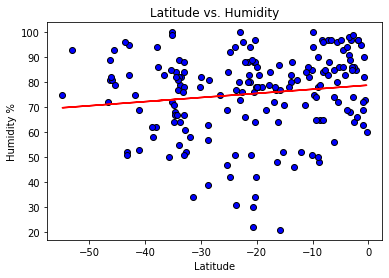

In [20]:
southhum = south_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(southlat, southhum)
print("The r value is: ", rvalue)
line_eq = southlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity")
plt.scatter(southlat, southhum, color = "blue", edgecolors = "black")
plt.plot(southlat, line_eq, color = "red")
plt.show

print("Humidity has no correlation with latitude!" )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is:  0.0010407564833052356
Humidity has a slightly negative Linear Regression correlation with latitude. As you travel higher North the cloudiness decreases!


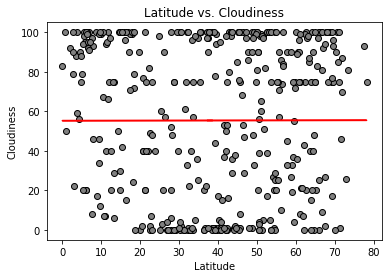

In [21]:
northclo = north_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(northlat, northclo)
print("The r value is: ", rvalue)
line_eq = northlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.scatter(northlat, northclo, color = "gray", edgecolors = "black")
plt.plot(northlat, line_eq, color = "red")
plt.show

print("Humidity has a slightly negative Linear Regression correlation with latitude. As you travel higher North the cloudiness decreases!" )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is:  0.11344303001949987
Humidity has a slightly positive Linear Regression correlation with latitude. As you travel North to the Equator the cloudiness increases!


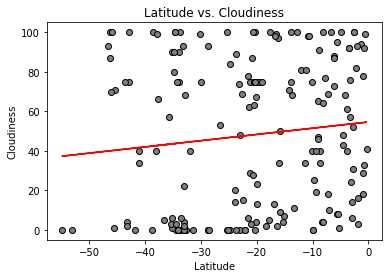

In [22]:
southclo = south_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(southlat, southclo)
print("The r value is: ", rvalue)
line_eq = southlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.scatter(southlat, southclo, color = "gray", edgecolors = "black")
plt.plot(southlat, line_eq, color = "red")
plt.show

print("Humidity has a slightly positive Linear Regression correlation with latitude. As you travel North to the Equator the cloudiness increases!" )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is:  0.12057976308360635
Humidity has a slightly positive Linear Regression correlation with latitude. As you travel higher North the wind speed in cities increases!


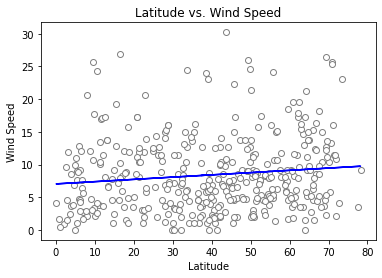

In [23]:
northWS = north_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(northlat, northWS)
print("The r value is: ", rvalue)
line_eq = northlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.scatter(northlat, northWS, color = "white", edgecolors = "gray")
plt.plot(northlat, line_eq, color = "blue")
plt.show

print("Humidity has a slightly positive Linear Regression correlation with latitude. As you travel higher North the wind speed in cities increases!" )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is:  -0.027611700316142383
Humidity has a negative Linear Regression correlation with latitude. As you travel North toward the Equator the wind speed in cities decreases!


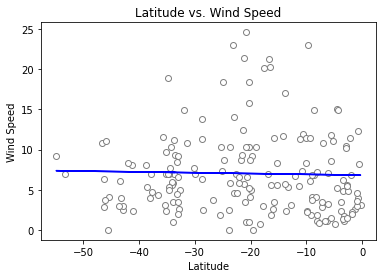

In [24]:
southWS = south_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(southlat, southWS)
print("The r value is: ", rvalue)
line_eq = southlat * slope + intercept
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.scatter(southlat, southWS, color = "white", edgecolors = "gray")
plt.plot(southlat, line_eq, color = "blue")
plt.show

print("Humidity has a negative Linear Regression correlation with latitude. As you travel North toward the Equator the wind speed in cities decreases!" )